# Erdos-Renyi plots

<Figure size 1500x1000 with 0 Axes>

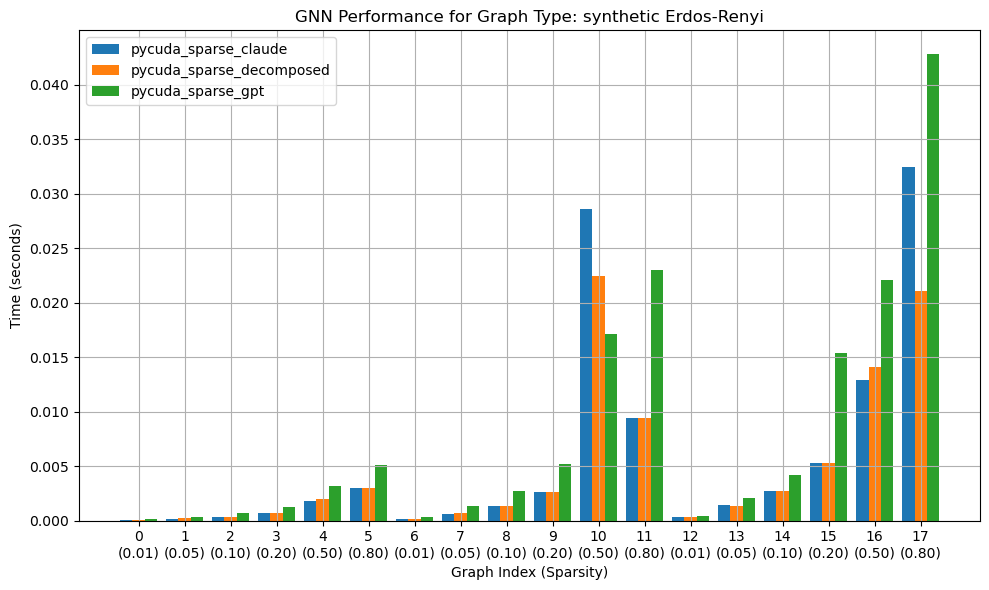

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

graph_name = 'Erdos-Renyi'

# select only Erdos-Renyi graphs
results = [result for result in results if graph_name in result['graph_name']]

# split the results by graph size
results_by_size = {}
for result in results:
    num_nodes = result['num_nodes']
    if num_nodes not in results_by_size:
        results_by_size[num_nodes] = []
    results_by_size[num_nodes].append(result)

# Extract data for plotting
methods = list(set(result['method'] for result in results if 'pycuda_sparse' in result['method']))  # Filter out non-sparse methods
graph_indices = sorted(set(result['graph_index'] for result in results))

# Extract graph properties for labeling
graph_properties = {result['graph_index']: (result['graph_name'], result['graph_type'], result.get('num_nodes'), result.get('sparsity')) for result in results}
method_times = {method: [] for method in methods}

for graph_index in graph_indices:
    for method in methods:
        times = [result['time_seconds'] for result in results if result['graph_index'] == graph_index and result['method'] == method]
        if times:
            method_times[method].append(times[0])
        else:
            method_times[method].append(np.nan)  # Use NaN for missing data

# Plot the results for each graph type separately
unique_graph_types = set(prop[1] for prop in graph_properties.values())
plt.figure(figsize=(15, 10))

for graph_type in unique_graph_types:
    plt.figure(figsize=(10, 6))
    filtered_indices = [index for index in graph_indices if graph_properties[index][1] == graph_type]
    num_graphs = len(filtered_indices)
    num_methods = len(methods)
    bar_width = 0.8 / num_methods  # Width of each bar

    for i, method in enumerate(methods):
        times = [method_times[method][graph_indices.index(index)] for index in filtered_indices]
        bar_positions = np.arange(num_graphs) + i * bar_width
        plt.bar(bar_positions, times, width=bar_width, label=method)

    # Create custom x-tick labels with graph index and sparsity
    x_tick_labels = [f'{index}\n({graph_properties[index][3]:.2f})' if graph_properties[index][3] is not None else f'{index}\n(N/A)' for index in filtered_indices]
    plt.xlabel('Graph Index (Sparsity)')
    plt.ylabel('Time (seconds)')
    plt.title(f'GNN Performance for Graph Type: {graph_type} {graph_name}')
    plt.xticks(np.arange(num_graphs) + bar_width * (num_methods - 1) / 2, x_tick_labels)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

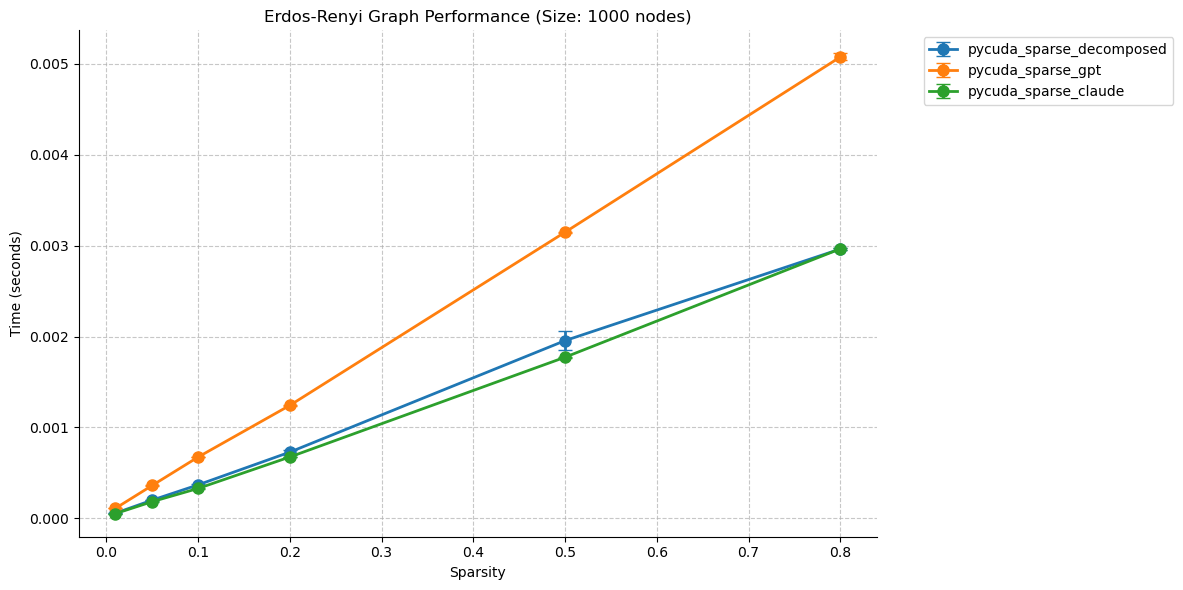

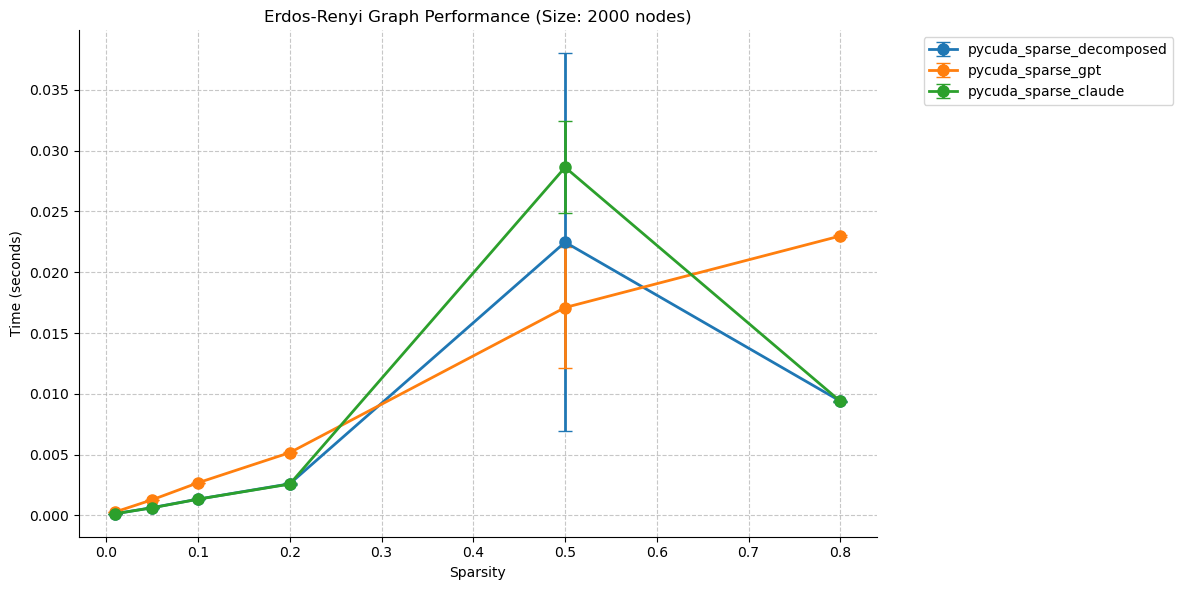

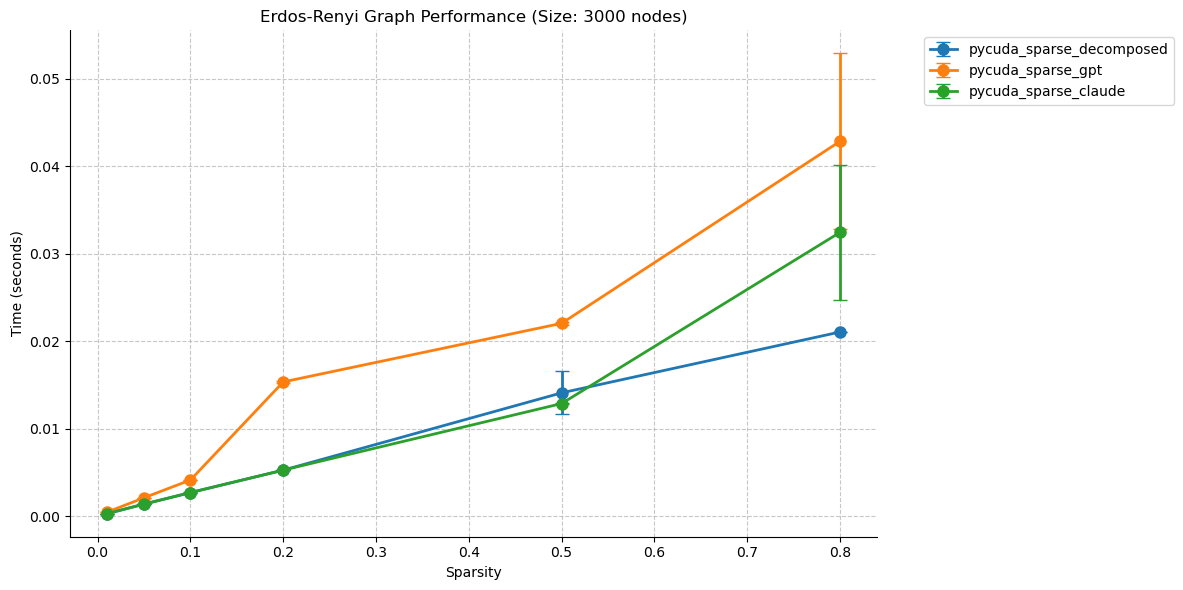

In [9]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

graph_name = 'Erdos-Renyi'
results = [result for result in results if graph_name in result['graph_name']]

# Group results by size and method
size_method_results = {}
for result in results:
    num_nodes = result['num_nodes']
    method = result['method']
    if 'pycuda_sparse' not in method:
        continue
    
    if num_nodes not in size_method_results:
        size_method_results[num_nodes] = {}
    if method not in size_method_results[num_nodes]:
        size_method_results[num_nodes][method] = []
    
    size_method_results[num_nodes][method].append({
        'sparsity': result.get('sparsity', 0),
        'time': result['time_seconds'],
        'std': result.get('time_std', 0)
    })

# Create plots for each size
for size, method_results in size_method_results.items():
    plt.figure(figsize=(12, 6))
    
    for method, results in method_results.items():
        # Sort by sparsity
        sorted_results = sorted(results, key=lambda x: x['sparsity'])
        sparsities = [r['sparsity'] for r in sorted_results]
        times = [r['time'] for r in sorted_results]
        stds = [r['std'] for r in sorted_results]
        
        plt.errorbar(sparsities, times, yerr=stds, 
                    label=method, marker='o', capsize=5,
                    linestyle='-', linewidth=2, markersize=8)
    
    plt.xlabel('Sparsity')
    plt.ylabel('Time (seconds)')
    plt.title(f'{graph_name} Graph Performance (Size: {size} nodes)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format axes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Scale-Free plots

<Figure size 1500x1000 with 0 Axes>

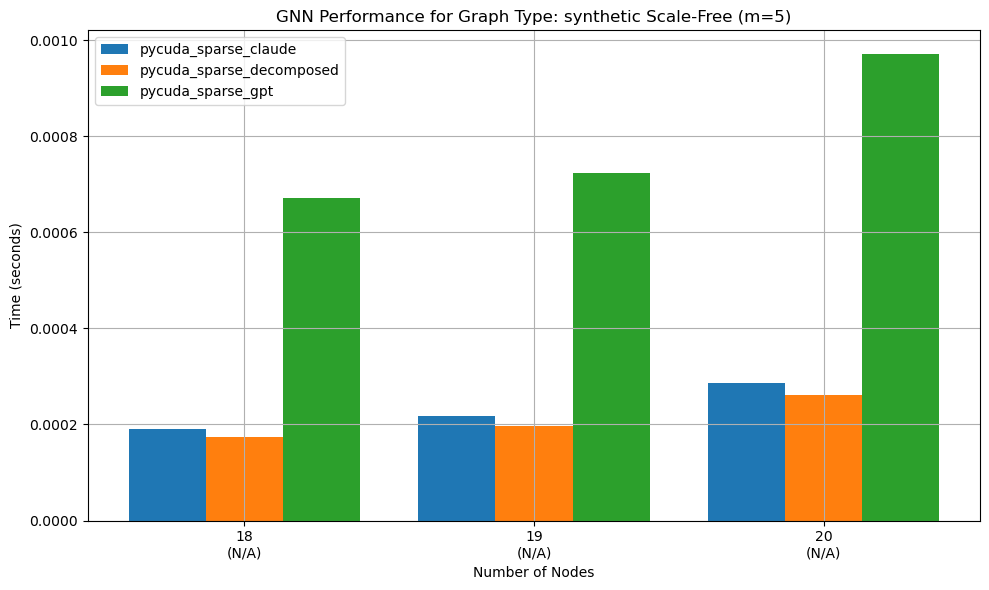

In [11]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load results
with open('gnn_results.json', 'r') as f:
    results = json.load(f)

graph_name = 'Scale-Free'

# select only Erdos-Renyi graphs
results = [result for result in results if graph_name in result['graph_name']]

# Extract data for plotting
methods = list(set(result['method'] for result in results if 'pycuda_sparse' in result['method']))  # Filter out non-sparse methods
graph_indices = sorted(set(result['graph_index'] for result in results))

# Extract graph properties for labeling
graph_properties = {result['graph_index']: (result['graph_name'], result['graph_type'], result.get('num_nodes'), result.get('sparsity')) for result in results}
method_times = {method: [] for method in methods}

for graph_index in graph_indices:
    for method in methods:
        times = [result['time_seconds'] for result in results if result['graph_index'] == graph_index and result['method'] == method]
        if times:
            method_times[method].append(times[0])
        else:
            method_times[method].append(np.nan)  # Use NaN for missing data

# Plot the results for each graph type separately
unique_graph_types = set(prop[1] for prop in graph_properties.values())
plt.figure(figsize=(15, 10))

for graph_type in unique_graph_types:
    plt.figure(figsize=(10, 6))
    filtered_indices = [index for index in graph_indices if graph_properties[index][1] == graph_type]
    num_graphs = len(filtered_indices)
    num_methods = len(methods)
    bar_width = 0.8 / num_methods  # Width of each bar

    for i, method in enumerate(methods):
        times = [method_times[method][graph_indices.index(index)] for index in filtered_indices]
        bar_positions = np.arange(num_graphs) + i * bar_width
        plt.bar(bar_positions, times, width=bar_width, label=method)

    # Create custom x-tick labels with graph index and sparsity
    x_tick_labels = [f'{index}\n({graph_properties[index][3]:.2f})' if graph_properties[index][3] is not None else f'{index}\n(N/A)' for index in filtered_indices]
    plt.xlabel('Number of Nodes')
    plt.ylabel('Time (seconds)')
    plt.title(f'GNN Performance for Graph Type: {graph_type} {graph_name} (m=5)')   # m=5 is the number of edges to attach from a new node to existing nodes
    plt.xticks(np.arange(num_graphs) + bar_width * (num_methods - 1) / 2, x_tick_labels)
    #
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()